In [1]:
import pandas as pd
import numpy as np

In [2]:
gentrification = pd.read_csv('2009_ACS_normalized_data.csv', encoding='utf-8')

In [3]:
gentrification.columns.size

494

In [4]:
gentrification.shape

(613, 494)

In [124]:
list(gentrification.columns.unique())

['Geography',
 'GENTRIFIED',
 'ACS_09_B08303_HD01_VD01_Estimate; Total:_100scale',
 'ACS_09_B08303_HD01_VD02_Estimate; Less than 5 minutes_100scale',
 'ACS_09_B08303_HD01_VD03_Estimate; 5 to 9 minutes_100scale',
 'ACS_09_B08303_HD01_VD04_Estimate; 10 to 14 minutes_100scale',
 'ACS_09_B08303_HD01_VD05_Estimate; 15 to 19 minutes_100scale',
 'ACS_09_B08303_HD01_VD06_Estimate; 20 to 24 minutes_100scale',
 'ACS_09_B08303_HD01_VD07_Estimate; 25 to 29 minutes_100scale',
 'ACS_09_B08303_HD01_VD08_Estimate; 30 to 34 minutes_100scale',
 'ACS_09_B08303_HD01_VD09_Estimate; 35 to 39 minutes_100scale',
 'ACS_09_B08303_HD01_VD10_Estimate; 40 to 44 minutes_100scale',
 'ACS_09_B08303_HD01_VD11_Estimate; 45 to 59 minutes_100scale',
 'ACS_09_B08303_HD01_VD12_Estimate; 60 to 89 minutes_100scale',
 'ACS_09_B08303_HD01_VD13_Estimate; 90 or more minutes_100scale',
 'ACS_09_B12002_HD01_VD01_Estimate; Total:_100scale',
 'ACS_09_B12002_HD01_VD02_Estimate; Male:_100scale',
 'ACS_09_B12002_HD01_VD03_Estimate; Mal

In [5]:
gentrification.columns = [x.strip().replace(' ', '_') for x in gentrification.columns]

In [6]:
gentrification.columns = [x.strip().replace( ';' , '_') for x in gentrification.columns]

In [7]:
gentrification.columns = [x.strip().replace( '-' , '') for x in gentrification.columns]

In [8]:
gentrification.columns = [x.strip().replace( ':' , '') for x in gentrification.columns]

In [9]:
gentrification.columns = [x.strip().replace( '(' , '') and x.strip().replace( ')' , '') for x in gentrification.columns]

In [10]:
gentrification.GENTRIFIED.dtype

dtype('bool')

In [11]:
gentrification.GENTRIFIED = gentrification.GENTRIFIED.apply(lambda x: x.astype(np.int64))

In [12]:
median_features = gentrification.dropna().median()
mean_features = gentrification.dropna().mean()

In [13]:
# imputed_features = gentrification.fillna(median_features)
imputed_mean_features = gentrification.fillna(mean_features)

In [149]:
target = imputed_features.GENTRIFIED.values #target array contains 613 counts

In [150]:
imputed_features = imputed_features.loc[:, (imputed_features != 0).any(axis=0)]

In [154]:
imputed_features.shape

(613, 494)

In [158]:
imputed_features.drop(imputed_features.columns[[0]], axis=1, inplace=True)

In [161]:
imputed_features.head(3)

,GENTRIFIED,ACS_09_B08303_HD01_VD01_Estimate__Total_100scale,ACS_09_B08303_HD01_VD02_Estimate__Less_than_5_minutes_100scale,ACS_09_B08303_HD01_VD03_Estimate__5_to_9_minutes_100scale,ACS_09_B08303_HD01_VD04_Estimate__10_to_14_minutes_100scale,ACS_09_B08303_HD01_VD05_Estimate__15_to_19_minutes_100scale,ACS_09_B08303_HD01_VD06_Estimate__20_to_24_minutes_100scale,ACS_09_B08303_HD01_VD07_Estimate__25_to_29_minutes_100scale,ACS_09_B08303_HD01_VD08_Estimate__30_to_34_minutes_100scale,ACS_09_B08303_HD01_VD09_Estimate__35_to_39_minutes_100scale,...,ACS_09_S2201_HC01_EST_VC23_Total__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale,ACS_09_S2201_HC02_EST_VC23_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale,ACS_09_S2201_HC03_EST_VC23_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale,ACS_09_S2201_HC01_EST_VC24_Total__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale,ACS_09_S2201_HC02_EST_VC24_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale,ACS_09_S2201_HC03_EST_VC24_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families__1_worker_in_past_12_months_100scale,ACS_09_S2201_HC01_EST_VC25_Total__Estimate__WORK_STATUS__Families__2_or_more_workers_in_past_12_months_100scale,ACS_09_S2201_HC02_EST_VC25_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__2_or_more_workers_in_past_12_months_100scale,ACS_09_S2201_HC03_EST_VC25_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__Families__2_or_more_workers_in_past_12_months_100scale,ACS_09_S2201_HC01_EST_VC27_Total__Estimate__PERCENT_IMPUTED__Food_stamp/SNAP_recipiency_100scale
0,0,27.11,13.69,7.53,13.63,14.93,15.25,6.68,20.02,29.18,...,24.36,23.5,21.27,77.86,54.1,65.90,39.14,22.4,41.36,10.99
1,0,14.02,0.00,5.72,0.71,8.69,19.06,7.98,12.56,0.00,...,63.82,63.2,32.55,74.41,32.3,81.17,16.00,4.5,22.55,43.96
2,0,5.35,0.00,11.14,7.79,2.69,4.15,1.60,7.35,3.93,...,0.00,0.0,0.00,60.44,79.3,22.84,66.00,20.7,87.62,65.93


In [168]:
imputed_features = imputed_features.applymap(np.int64)

In [184]:
imputed_features.to_csv("cleaned_imputed_features.csv", encoding='utf-8', index=False)

In [3]:
cleaned_features = pd.read_csv("cleaned_imputed_features.csv", encoding='utf-8')

In [36]:
cleaned_features.to_csv('all_features.txt', encoding='utf-8', header=False, index=False) 

In [11]:
features_array  = cleaned_features.values

In [12]:
target = cleaned_features.GENTRIFIED.values

In [13]:
from sklearn.cross_validation import train_test_split

features_train, features_test, target_train, target_test = train_test_split(
    features_array, target, test_size=0.20, random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1)
logreg.fit(features_train, target_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [15]:
target_predicted = logreg.predict(features_test)

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_predicted)

0.86991869918699183

In [17]:
logreg.score(features_test, target_test)

0.86991869918699183

In [19]:
feature_names = cleaned_features.columns

In [20]:
feature_names

Index(['GENTRIFIED', 'ACS_09_B08303_HD01_VD01_Estimate__Total_100scale',
       'ACS_09_B08303_HD01_VD02_Estimate__Less_than_5_minutes_100scale',
       'ACS_09_B08303_HD01_VD03_Estimate__5_to_9_minutes_100scale',
       'ACS_09_B08303_HD01_VD04_Estimate__10_to_14_minutes_100scale',
       'ACS_09_B08303_HD01_VD05_Estimate__15_to_19_minutes_100scale',
       'ACS_09_B08303_HD01_VD06_Estimate__20_to_24_minutes_100scale',
       'ACS_09_B08303_HD01_VD07_Estimate__25_to_29_minutes_100scale',
       'ACS_09_B08303_HD01_VD08_Estimate__30_to_34_minutes_100scale',
       'ACS_09_B08303_HD01_VD09_Estimate__35_to_39_minutes_100scale', 
       ...
       'ACS_09_S2201_HC01_EST_VC23_Total__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale',
       'ACS_09_S2201_HC02_EST_VC23_Households_receiving_food_stamps__Estimate__WORK_STATUS__Families__No_workers_in_past_12_months_100scale',
       'ACS_09_S2201_HC03_EST_VC23_Households_not_receiving_food_stamps__Estimate__WORK_STATUS__F

In [21]:
logreg.coef_

array([[  3.21982701e-33,  -1.62127296e-33,  -1.74844278e-33,
          5.48915337e-35,  -1.50615293e-33,  -9.31657849e-34,
         -4.07545132e-33,   6.61032571e-33,  -1.15366703e-33,
         -8.08109451e-33,   5.95202571e-33,   5.83722996e-33,
         -7.36651507e-34,  -1.88765853e-32,  -2.53816638e-33,
         -3.89754410e-33,  -7.43992103e-33,   6.04805518e-33,
         -1.04039771e-32,  -5.75370514e-33,   4.41743157e-33,
         -2.42844718e-32,   8.89479614e-34,  -6.89947059e-34,
         -7.44871827e-34,  -7.26469507e-35,  -6.86565249e-33,
         -3.18055995e-33,  -1.57679184e-34,  -4.88406471e-34,
          4.88391218e-33,   1.09929149e-34,   1.36052381e-33,
         -6.96488646e-21,  -2.04060289e-34,   4.95395641e-33,
          3.33468085e-33,   7.28094136e-33,  -5.03363393e-33,
         -6.10289163e-34,   3.09246317e-33,   1.50230929e-33,
          4.48587076e-33,  -6.20264085e-33,  -2.60396681e-34,
          5.39614677e-33,  -1.06197286e-32,  -3.41338606e-33,
        

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, target_predicted)
print(cm)

[[106   3]
 [ 13   1]]


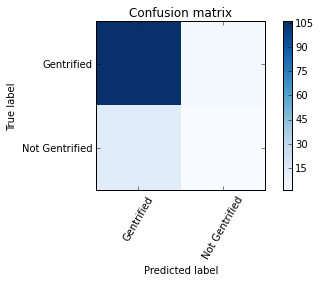

In [28]:
def plot_confusion(cm, target_names = ['Gentrified', 'Not Gentrified'],
                   title='Confusion matrix'):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=60)
    plt.yticks(tick_marks, target_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Convenience function to adjust plot parameters for a clear layout.
    plt.tight_layout()
    
plot_confusion(cm)

In [29]:
cm.sum(axis=1)

array([109,  14])

In [30]:
cm_normalized = cm.astype(np.float64) / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

[[ 0.97247706  0.02752294]
 [ 0.92857143  0.07142857]]


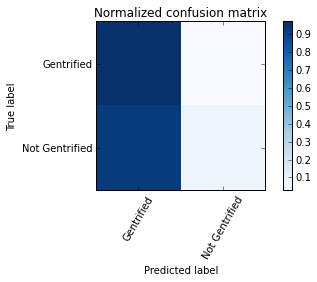

In [31]:
plot_confusion(cm_normalized, title="Normalized confusion matrix")

In [32]:
from sklearn.metrics import classification_report

print(classification_report(target_test, target_predicted,
                            target_names=['Gentrified', 'Not Gentrified']))

                precision    recall  f1-score   support

    Gentrified       0.89      0.97      0.93       109
Not Gentrified       0.25      0.07      0.11        14

   avg / total       0.82      0.87      0.84       123



In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")

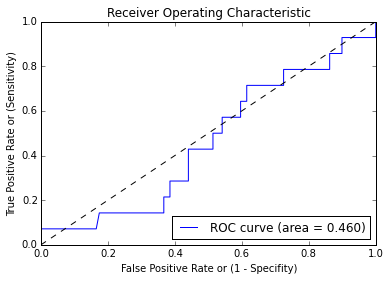

In [39]:
target_predicted_prob = logreg.predict_proba(features_test)
plot_roc_curve(target_test,target_predicted_prob)

In [43]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(logreg, features_array, target, cv=3)

In [44]:
scores

array([ 0.69756098,  0.64215686,  0.8817734 ])

In [45]:
scores.min(), scores.max(), scores.mean()

(0.64215686274509809, 0.88177339901477836, 0.74049707912321094)

In [46]:
scores = cross_val_score(logreg, features_array, target, cv=3,
                         scoring='roc_auc')
scores.min(), scores.mean(), scores.max()

(0.39900575614861328, 0.47944842909714103, 0.55091902632886236)